In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
trainnews=pd.read_csv('train_news.csv')


In [28]:
trainnews.shape

(20800, 6)

In [29]:
trainnews.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [30]:
trainnews.describe()

Unnamed: 0            id         label
count  20800.000000  20800.000000  20800.000000
mean   10399.500000  10399.500000      0.500625
std     6004.587135   6004.587135      0.500012
min        0.000000      0.000000      0.000000
25%     5199.750000   5199.750000      0.000000
50%    10399.500000  10399.500000      1.000000
75%    15599.250000  15599.250000      1.000000
max    20799.000000  20799.000000      1.000000

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


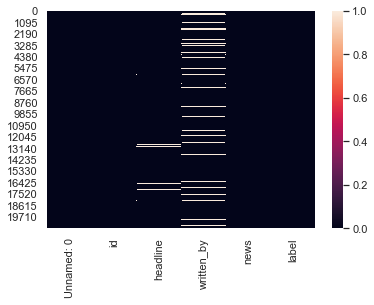

In [31]:
print(trainnews.isnull().sum())
print(sns.heatmap(trainnews.isnull()))

In [32]:
def handle_nan(trainnews_data):
    trainnews=trainnews_data.fillna(" ")
    return trainnews
trainnews = handle_nan(trainnews)

In [33]:
trainnews=trainnews.drop('Unnamed: 0',axis=1)

            id    label
id     1.00000  0.00114
label  0.00114  1.00000
AxesSubplot(0.125,0.125;0.62x0.755)


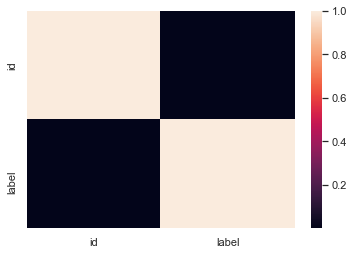

In [34]:
print(trainnews.corr())
print(sns.heatmap(trainnews.corr()))

In [39]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [40]:
list1=['headline', 'written_by', 'news',]
for i in list1:
    # Convert all messages to lower case
    trainnews[i] = trainnews[i].str.lower()

# Replace email addresses with 'email'
    trainnews[i] = trainnews[i].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
    trainnews[i] = trainnews[i].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    trainnews[i] = trainnews[i].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    trainnews[i] = trainnews[i].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
    trainnews[i] = trainnews[i].str.replace(r'\d+(\.\d+)?', 'numbr')


    trainnews[i] = trainnews[i].apply(lambda x: ' '.join(
        term for term in x.split() if term not in string.punctuation))

    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    trainnews[i] = trainnews[i].apply(lambda x: ' '.join(
        term for term in x.split() if term not in stop_words))

    lem=WordNetLemmatizer()
    trainnews[i] = trainnews[i].apply(lambda x: ' '.join(
     lem.lemmatize(t) for t in x.split()))

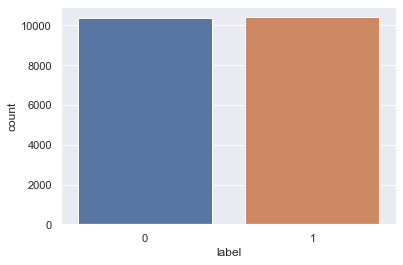

In [41]:
sns.set()
sns.countplot(x="label",data=trainnews)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


In [44]:
x=trainnews.drop(['label'],axis=1)

In [46]:
y=pd.DataFrame(trainnews['label'])

In [47]:
x.columns

Index(['id', 'headline', 'written_by', 'news'], dtype='object')

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
list3=['headline','written_by','news']
tf_vec=TfidfVectorizer(max_features=10000,stop_words='english')
for i in list3:
    features=tf_vec.fit_transform(trainnews[i])
    x=features

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [52]:
y_train.shape,y_test.shape

((14560, 1), (6240, 1))

In [53]:
x_train.shape,x_test.shape

((14560, 10000), (6240, 10000))

In [54]:
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9682692307692308
Test accuracy is 0.9474358974358974
[[2892  190]
 [ 138 3020]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3082
           1       0.94      0.96      0.95      3158

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



In [55]:
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999313186813187
Test accuracy is 0.8889423076923076
[[2735  347]
 [ 346 2812]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3082
           1       0.89      0.89      0.89      3158

    accuracy                           0.89      6240
   macro avg       0.89      0.89      0.89      6240
weighted avg       0.89      0.89      0.89      6240



In [56]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.5848214285714286
Test accuracy is 0.5732371794871794
[[ 443 2639]
 [  24 3134]]
              precision    recall  f1-score   support

           0       0.95      0.14      0.25      3082
           1       0.54      0.99      0.70      3158

    accuracy                           0.57      6240
   macro avg       0.75      0.57      0.48      6240
weighted avg       0.74      0.57      0.48      6240



In [62]:
prediction1=(y_pred_test)
prediction1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
pred1=pd.DataFrame(prediction1)

In [65]:
pred1.head()

0
0  1
1  1
2  1
3  1
4  1